In [4]:
from sklearn.linear_model import LinearRegression

import numpy as np

# 设置随机种子
np.random.seed(42)

# 模拟生成一些线性数据
X = 2 + np.random.rand(100, 1)
y = 4 + 3 * X + np.random.rand(100, 1)
X_b = np.c_[np.ones((100, 1)), X]

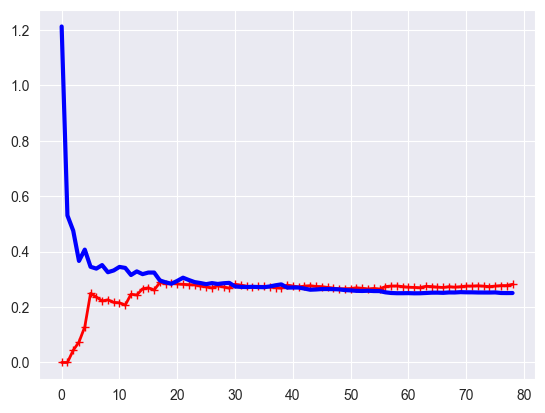

In [5]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X_b, y, test_size=0.2, random_state= 42)
    train_errors, val_errors =[], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth= 2, label = "train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth= 3, label = "val")

lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

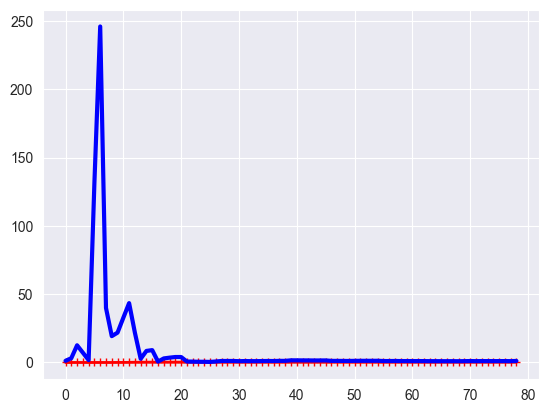

In [6]:
# 测试在相同数据上的10阶多项式模型
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree= 10, include_bias= False)),
    ("lin_reg", LinearRegression())
])
plot_learning_curves(polynomial_regression, X, y)